<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por:  Diego Gutierrez,r   <br>

Fecha: 07/09/2024

## Importación de librerias necesarias

In [6]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

## Cargar el Dataset

In [7]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df = pd.read_csv(url, delimiter= ';')
df.head()


,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Explique el problema a resolver.
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [8]:
#Analisis de variables
descripciones_atributos = {
    'Buying': 'Costo de vehiculo',
    'Maintenance': 'Costo de Mantenimiento',
    'Doors': 'Numero de puertas',
    'Person': 'Capacidad de personas',
    'lug_boot': 'Tipo de maletero',
    'safety': 'Nivel de seguridad',
#Variable Objetivo
    'class': 'Clasificacion',
}

df.drop_duplicates()
df.isnull().sum()

#Separar las características (variables de entrada) y la variable objetivo
X = df.drop(columns='class')  # Variables de entrada
y = df['class']               # Variable objetivo

In [9]:
#Código que responde a la descripción anterior
# Verificar las clases únicas en la variable objetivo 'class'
clases_unicas = df['class'].unique()
num_clases = len(clases_unicas)

print(f"Número de clases: {num_clases}")
print(f"Clases presentes en la variable objetivo: {clases_unicas}")
print("Significado de las clases:")
print("- 'unacc': Inaceptable")
print("- 'acc': Aceptable")
print("- 'good': Bueno")
print("- 'vgood': Muy bueno")
print("")

num_instancias = df.shape[0]
print(f"Número total de instancias: {num_instancias}")
print("")
# Contar el número de instancias en cada clase
instancias_por_clase = df['class'].value_counts()
print("Número de instancias por clase:")
print(instancias_por_clase)
print("")
# Número de atributos de entrada
atributos_entrada = df.drop('class', axis=1).columns
num_atributos = len(atributos_entrada)
print("")
print(f"Número de atributos de entrada: {num_atributos}")
print("Atributos y su significado:")
print("- 'Buying': Precio del auto (vhigh, high, med, low)")
print("- 'Maintenance': Costo de mantenimiento (vhigh, high, med, low)")
print("- 'Doors': Número de puertas (2, 3, 4, 5more)")
print("- 'Person': Capacidad de personas (2, 4, more)")
print("- 'lug_boot': Tamaño del maletero (small, med, big)")
print("- 'safety': Nivel de seguridad (low, med, high)")
print("")
# Verificar si hay valores faltantes en el conjunto de datos
valores_faltantes = df.isnull().sum()

print("¿Hay valores faltantes en los atributos?:")
print(valores_faltantes[valores_faltantes > 0] if valores_faltantes.sum() > 0 else "No hay valores faltantes")


Número de clases: 4
Clases presentes en la variable objetivo: ['unacc' 'acc' 'vgood' 'good']
Significado de las clases:
- 'unacc': Inaceptable
- 'acc': Aceptable
- 'good': Bueno
- 'vgood': Muy bueno

Número total de instancias: 1750

Número de instancias por clase:
class
unacc    1215
acc       390
good       75
vgood      70
Name: count, dtype: int64


Número de atributos de entrada: 6
Atributos y su significado:
- 'Buying': Precio del auto (vhigh, high, med, low)
- 'Maintenance': Costo de mantenimiento (vhigh, high, med, low)
- 'Doors': Número de puertas (2, 3, 4, 5more)
- 'Person': Capacidad de personas (2, 4, more)
- 'lug_boot': Tamaño del maletero (small, med, big)
- 'safety': Nivel de seguridad (low, med, high)

¿Hay valores faltantes en los atributos?:
No hay valores faltantes


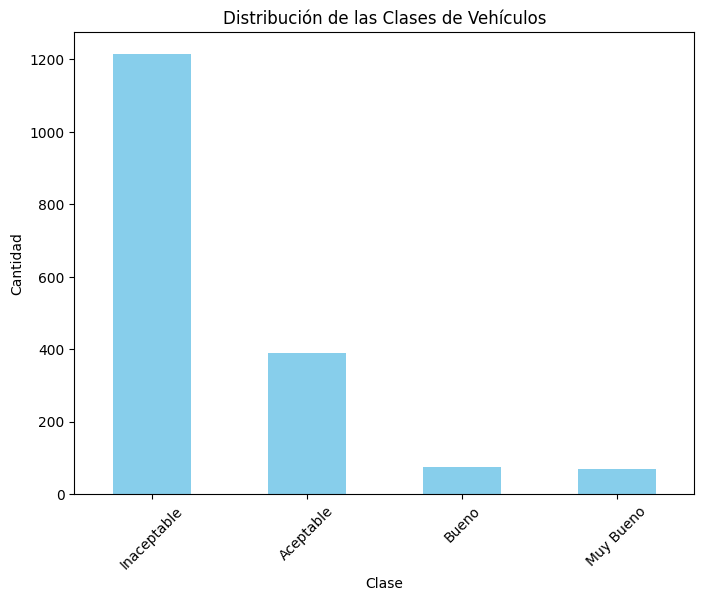

In [10]:
#Aplicar One-Hot Encoding a las variables categóricas
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X).toarray()

#Renombrar las categorías de la variable 'class'
nuevos_nombres = {
    'unacc': 'Inaceptable',
    'acc': 'Aceptable',
    'good': 'Bueno',
    'vgood': 'Muy Bueno'
}

#Aplicar los nuevos nombres a la variable objetivo 'y'
y_renamed = y.replace(nuevos_nombres)

#Dividir el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_renamed, test_size=0.3, random_state=42)

#Visualización de la distribución de clases en un histograma
plt.figure(figsize=(8, 6))
y_renamed.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de las Clases de Vehículos')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
print("\nVerificación de valores faltantes:")
print(df.isnull().sum())  # No se encontraron valores faltantes en este dataset

# Codificación de las variables categóricas
# Usamos LabelEncoder para convertir las variables categóricas en numéricas

# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar la codificación a todas las columnas del dataset
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

# Mostrar el dataset después de la codificación
print("\nDataset después de la codificación de variables categóricas:")
print(df.head())

# Separar la variable objetivo (class) de las variables predictoras
X = df.drop('class', axis=1)  # Variables de entrada
y = df['class']  # Variable objetivo

# Escalado de las variables
# En este caso, vamos a escalar las variables predictoras usando StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Verificación de valores faltantes:
Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64

Dataset después de la codificación de variables categóricas:
   Buying  Maintenance  Doors  Person  lug_boot  safety  class
0       3            3      0       0         2       1      2
1       3            3      0       0         2       2      2
2       3            3      0       0         2       0      2
3       3            3      0       0         1       1      2
4       3            3      0       0         1       2      2


## División del dataset en datos de entrenamiento y datos de test

In [12]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.

# Usamos un 70% de los datos para entrenamiento y 30% para pruebas
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("\nDimensiones de los conjuntos de datos:")
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

# Mostrar un ejemplo de los datos procesados
print("\nDatos procesados y listos para modelar:")
print(f"X_train:\n{X_train[:5]}")
print(f"y_train:\n{y_train[:5]}")


Dimensiones de los conjuntos de datos:
Conjunto de entrenamiento: (1225, 6)
Conjunto de prueba: (525, 6)

Datos procesados y listos para modelar:
X_train:
[[ 0.43854143  1.34482359 -1.33239012 -0.00490676  0.00209927  1.22756025]
 [-1.35038048  0.44793286  1.3436038   1.22178203  1.22667191  1.22756025]
 [-1.35038048  1.34482359 -1.33239012 -1.23159554 -1.22247338 -1.21638791]
 [-1.35038048  1.34482359 -0.44039214  1.22178203  1.22667191 -1.21638791]
 [ 0.43854143 -0.44895788  1.3436038  -1.23159554  0.00209927  1.22756025]]
y_train:
888     2
759     2
451     2
490     2
1290    2
Name: class, dtype: int64


### **Ajuste de los modelos de clasificación propuestos**


---



1.   Elemento de lista
2.   Elemento de lista



Justifique la selección de las dos propuestas de modelación seleccionadas:

In [13]:
#Código de ajuste del modelo de clasificación 1
# Creacion del modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Ajuste del modelo a los datos de entrenamiento
decision_tree.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_tree = decision_tree.predict(X_test)

# Evaluacion del rendimiento del Árbol de Decisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión del Árbol de Decisión: {accuracy_tree:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))


Precisión del Árbol de Decisión: 0.9733

Reporte de Clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.92      1.00      0.96        22
           2       0.98      0.98      0.98       355
           3       1.00      0.93      0.97        15

    accuracy                           0.97       525
   macro avg       0.96      0.97      0.96       525
weighted avg       0.97      0.97      0.97       525



In [14]:
#Código de ajuste del modelo de clasificación 2
# Creacion del modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajuste del modelo a los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = random_forest.predict(X_test)

# Evaluacion del rendimiento del Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest: {accuracy_rf:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))



Precisión del Random Forest: 0.9733

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       133
           1       0.88      1.00      0.94        22
           2       0.99      0.99      0.99       355
           3       0.93      0.93      0.93        15

    accuracy                           0.97       525
   macro avg       0.94      0.96      0.95       525
weighted avg       0.97      0.97      0.97       525



## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión


Instancias clasificadas correctamente - Árbol de Decisión: 511


Instancias clasificadas incorrectamente - Árbol de Decisión: 14


Tasa de Verdaderos Positivos (TPR) - Árbol de Decisión: [0.94736842 1.         0.98309859 0.93333333]


Tasa de Falsos Positivos (FPR) - Árbol de Decisión: [0.01142857 0.00380952 0.01142857 0.        ]


Matriz de Confusión - Árbol de Decisión:
[[126   1   6   0]
 [  0  22   0   0]
 [  5   1 349   0]
 [  1   0   0  14]]




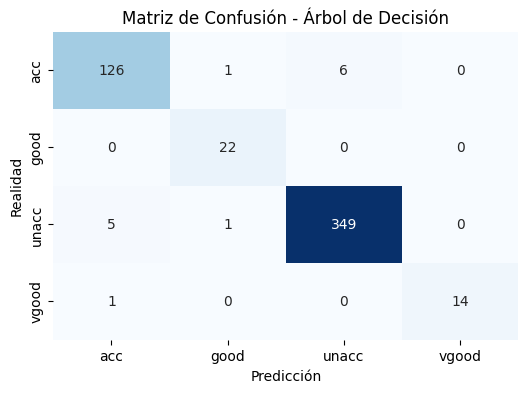

In [15]:
#Código para mostrar la evaluación del modelo de clasificación 1
# Importamos las métricas necesarias
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculamos la matriz de confusión para Árbol de Decisión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Instancias clasificadas correctamente
correctly_classified_tree = accuracy_score(y_test, y_pred_tree) * len(y_test)
print(f"Instancias clasificadas correctamente - Árbol de Decisión: {int(correctly_classified_tree)}")
print("\n")
# Instancias clasificadas incorrectamente
incorrectly_classified_tree = len(y_test) - correctly_classified_tree
print(f"Instancias clasificadas incorrectamente - Árbol de Decisión: {int(incorrectly_classified_tree)}")
print("\n")
# (TPR) - Tasa de verdaderos positivos
TPR_tree = conf_matrix_tree.diagonal() / conf_matrix_tree.sum(axis=1)
print(f"Tasa de Verdaderos Positivos (TPR) - Árbol de Decisión: {TPR_tree}")
print("\n")
# (FPR) - Tasa de falsos positivos
FPR_tree = (conf_matrix_tree.sum(axis=0) - conf_matrix_tree.diagonal()) / conf_matrix_tree.sum()
print(f"Tasa de Falsos Positivos (FPR) - Árbol de Decisión: {FPR_tree}")
print("\n")
# Mostramos la matriz de confusión
print(f"Matriz de Confusión - Árbol de Decisión:\n{conf_matrix_tree}")
print("\n")

# Creacion del gráfico de calor para la matriz de confusión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


Construya un párrafo con los principales hallazgos.

Instancias clasificadas correctamente - Random Forest: 511


Instancias clasificadas incorrectamente - Random Forest: 14


Tasa de Verdaderos Positivos (TPR) - Random Forest: [0.93984962 1.         0.98591549 0.93333333]


Tasa de Falsos Positivos (FPR) - Random Forest: [0.01142857 0.00571429 0.00761905 0.00190476]


Matriz de Confusión - Random Forest:
[[125   3   4   1]
 [  0  22   0   0]
 [  5   0 350   0]
 [  1   0   0  14]]




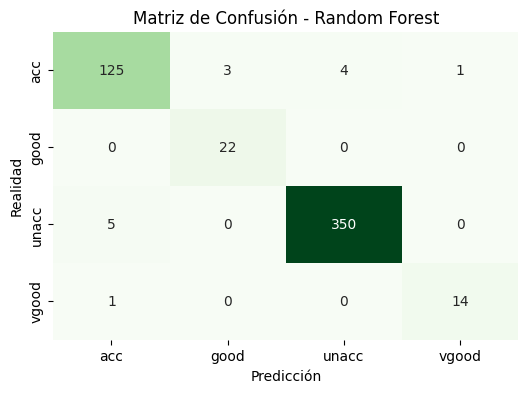

In [16]:
#Código  para mostrarla evaluación del modelo de clasificación 2

# Calculamos la matriz de confusión para Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Instancias clasificadas correctamente
correctly_classified_rf = accuracy_score(y_test, y_pred_rf) * len(y_test)
print(f"Instancias clasificadas correctamente - Random Forest: {int(correctly_classified_rf)}")
print("\n")
# Instancias clasificadas incorrectamente
incorrectly_classified_rf = len(y_test) - correctly_classified_rf
print(f"Instancias clasificadas incorrectamente - Random Forest: {int(incorrectly_classified_rf)}")
print("\n")
# (TPR) - Tasa de verdaderos positivos
TPR_rf = conf_matrix_rf.diagonal() / conf_matrix_rf.sum(axis=1)
print(f"Tasa de Verdaderos Positivos (TPR) - Random Forest: {TPR_rf}")
print("\n")
# (FPR) - Tasa de falsos positivos
FPR_rf = (conf_matrix_rf.sum(axis=0) - conf_matrix_rf.diagonal()) / conf_matrix_rf.sum()
print(f"Tasa de Falsos Positivos (FPR) - Random Forest: {FPR_rf}")
print("\n")
# Mostramos la matriz de confusión
print(f"Matriz de Confusión - Random Forest:\n{conf_matrix_rf}")
print("\n")

# Creacion del gráfico de calor para la matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Construya un párrafo con los principales hallazgos.

## Comparación del desempeño de modelos

In [17]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

# Función para calcular TPR y FPR
def calculate_tpr_fpr(conf_matrix):
    # TPR (True Positive Rate) por clase
    TPR = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    # FPR (False Positive Rate) por clase
    FPR = (conf_matrix.sum(axis=0) - conf_matrix.diagonal()) / conf_matrix.sum()

    return TPR.mean(), FPR.mean()

# Evaluación del Árbol de Decisión
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
TPR_tree, FPR_tree = calculate_tpr_fpr(conf_matrix_tree)

# Evaluación de Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
TPR_rf, FPR_rf = calculate_tpr_fpr(conf_matrix_rf)

# Creacion de un DataFrame con las métricas para ambos modelos
comparison_table = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Random Forest'],
    'Precisión': [accuracy_tree, accuracy_rf],
    'TPR (Tasa de Verdaderos Positivos)': [TPR_tree, TPR_rf],
    'FPR (Tasa de Falsos Positivos)': [FPR_tree, FPR_rf],
    'Instancias Correctas': [int(accuracy_tree * len(y_test)), int(accuracy_rf * len(y_test))],
    'Instancias Incorrectas': [len(y_test) - int(accuracy_tree * len(y_test)), len(y_test) - int(accuracy_rf * len(y_test))]
})

# Mostrar la tabla de comparación
print(comparison_table)


              Modelo  Precisión  TPR (Tasa de Verdaderos Positivos)  \
0  Árbol de Decisión   0.973333                            0.965950   
1      Random Forest   0.973333                            0.964775   

   FPR (Tasa de Falsos Positivos)  Instancias Correctas  \
0                        0.006667                   511   
1                        0.006667                   511   

   Instancias Incorrectas  
0                      14  
1                      14  


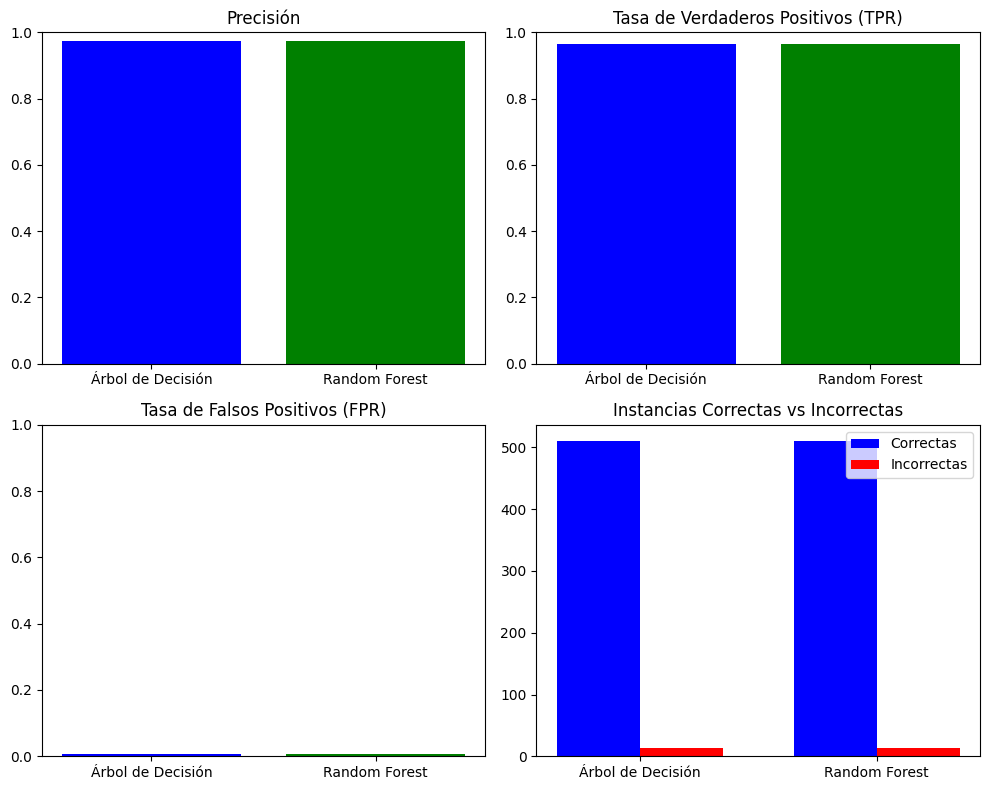

In [18]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

# Definir las métricas para ambos modelos
modelos = ['Árbol de Decisión', 'Random Forest']
precision = [accuracy_tree, accuracy_rf]
tpr = [TPR_tree, TPR_rf]
fpr = [FPR_tree, FPR_rf]
correctas = [int(accuracy_tree * len(y_test)), int(accuracy_rf * len(y_test))]
incorrectas = [len(y_test) - int(accuracy_tree * len(y_test)), len(y_test) - int(accuracy_rf * len(y_test))]

# Configuración de subplots para tener varias gráficas juntas
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Gráfica de Precisión
axs[0, 0].bar(modelos, precision, color=['blue', 'green'])
axs[0, 0].set_title('Precisión')
axs[0, 0].set_ylim([0, 1])

# Gráfica de TPR (Tasa de Verdaderos Positivos)
axs[0, 1].bar(modelos, tpr, color=['blue', 'green'])
axs[0, 1].set_title('Tasa de Verdaderos Positivos (TPR)')
axs[0, 1].set_ylim([0, 1])

# Gráfica de FPR (Tasa de Falsos Positivos)
axs[1, 0].bar(modelos, fpr, color=['blue', 'green'])
axs[1, 0].set_title('Tasa de Falsos Positivos (FPR)')
axs[1, 0].set_ylim([0, 1])

# Gráfica de Instancias Correctas e Incorrectas
width = 0.35  # Ancho de las barras
x = np.arange(len(modelos))  # Etiquetas de los grupos

# Gráfica de instancias correctas e incorrectas
rects1 = axs[1, 1].bar(x - width/2, correctas, width, label='Correctas', color='blue')
rects2 = axs[1, 1].bar(x + width/2, incorrectas, width, label='Incorrectas', color='red')

# Añadir etiquetas, título y leyenda
axs[1, 1].set_title('Instancias Correctas vs Incorrectas')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(modelos)
axs[1, 1].legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()



Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: ventajas y desventajas de cada modelo propuesto, Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. Recomendaciones de mejora de las propuestas: